In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict,cross_val_score, train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error,mean_squared_error, classification_report, confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve, recall_score

In [2]:
print(os.listdir("../181101059"))

['.ipynb_checkpoints', '181101059.ipynb', '181101059.pdf', '181101059_test.ipynb', 'requirements.txt', 'WA_Fn-UseC_-HR-Employee-Attrition.csv']


In [3]:
data = pd.read_csv("../181101059/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
data.isnull().values.any()

False

In [6]:
target = data['Attrition']

In [7]:
target.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [8]:
target.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In this info section, we learned there are how many columns and rows, also types of features. I can say there is no missing/NULL values in dataset. <br>
For target, there is an imbalance problem. In machine learning models, mostly that means overfit problem.

In [9]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Inside of dataset, there are numerical and categorical features.

In [10]:
data = data.drop_duplicates()

In [11]:
data.shape

(1470, 35)

I am going to use histogram graph to see the distribution of numeric features and, bar graph for categorical features.

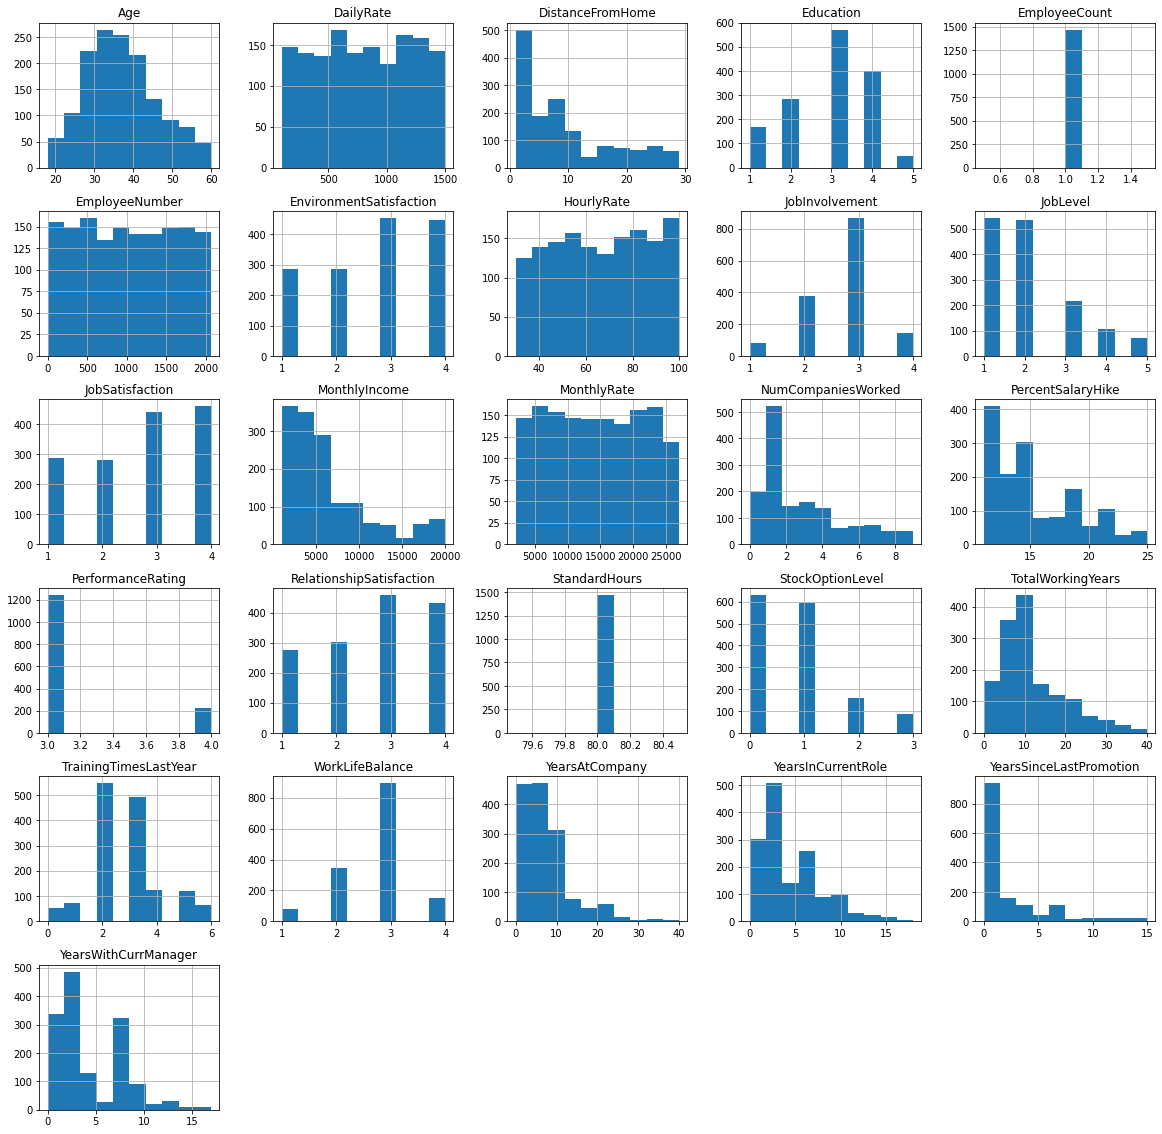

In [12]:
data.hist(figsize=(20,20))
plt.show()

In [13]:
arr_category = data.select_dtypes(include='object')

In [14]:
arr_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   Over18          1470 non-null   object
 8   OverTime        1470 non-null   object
dtypes: object(9)
memory usage: 114.8+ KB


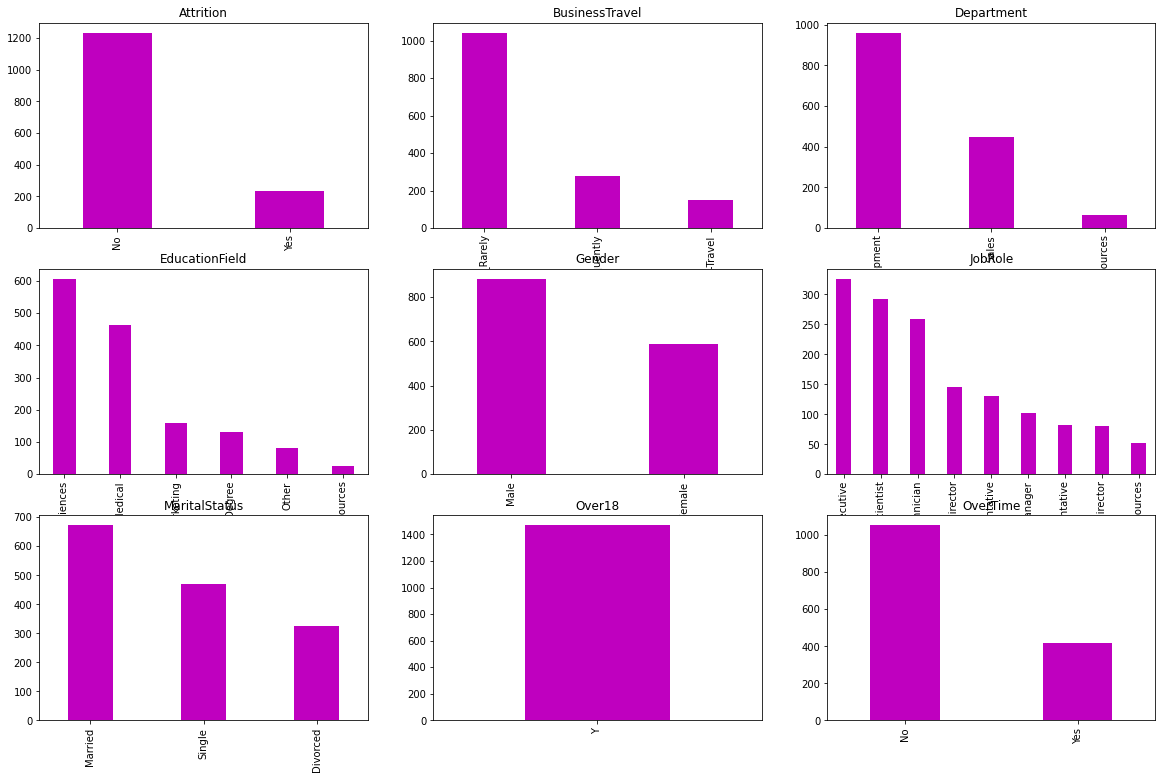

In [15]:
fig = plt.figure(figsize = (20, 40))
for i in range(len(arr_category.columns)):
    fig.add_subplot(9,3,i+1)
    arr_category.iloc[:,i].value_counts().plot(kind="bar",  subplots=True, width = 0.4, color='m')
    

There are three features which have exactly one value in the every sample. These are Over18, StandardHours and EmployeeCount. They don't give any spesific information for the probability of an employee leaving the company. Because of that, I will drop them from data.

In [16]:
#I will add this line to preprocessing Pipeline. Because of that I will just showing in here as comment
#data.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1,inplace=True)

In [17]:
arr_numerical= data.select_dtypes(include='int64')

In [18]:
data_corr = data.copy()
data_corr['Target'] = target.apply(lambda x: 0 if x == 'No' else 1)
data_corr = data_corr.drop(['Attrition'], axis=1)
correlations = data_corr.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(6))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
EmployeeCount              NaN
StandardHours              NaN
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


Based on the results above, we can select the five features most relevant to our goal.

For seeing connection between features, I use heatmap.

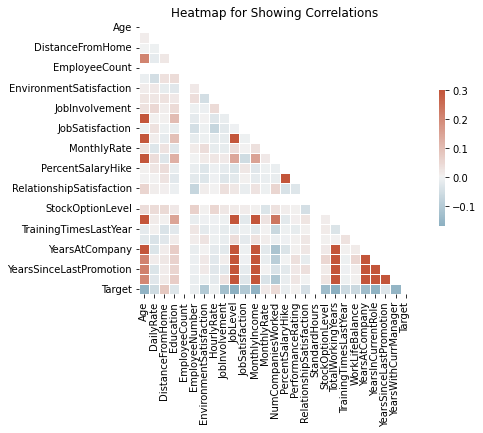

In [19]:
corr = data_corr.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap for Showing Correlations');

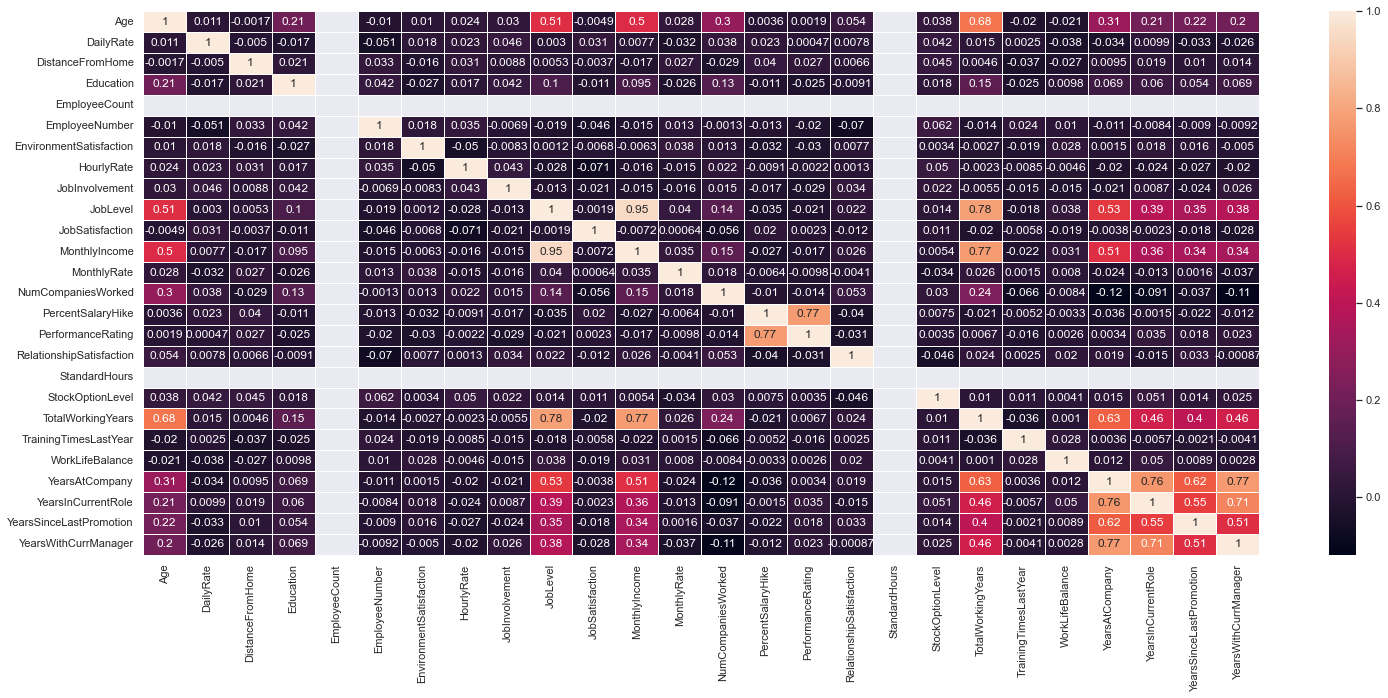

In [20]:
#Also we have numerical version of heatmap
sns.set_theme()
corr = arr_numerical.corr()
f, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax);

After analyzing maps,<br> 
I can say:<br> 
JobLevel, Education, MontlyIncome, NumCompaniesWorked, TotalWorkingYears, YearsCompany with Age<br> 
MonthlyIncome,TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager with JobLevel<br> 
TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager with MonthlyIncome<br> 
YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager with TotalWorkingYears<br> 
and YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager with each other<br> 
have a strong connection.

# Age-JobLevel

C:\Users\Gökçe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


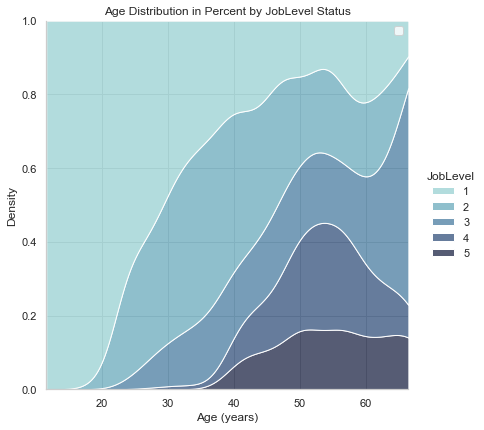

In [21]:
sns.set_theme(style="whitegrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
sns.displot(
    data=data,
    x="Age", hue="JobLevel",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75", ax=ax
)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by JobLevel Status');

As the graph shows, senior jobs have older people and only a fraction of the total employees.

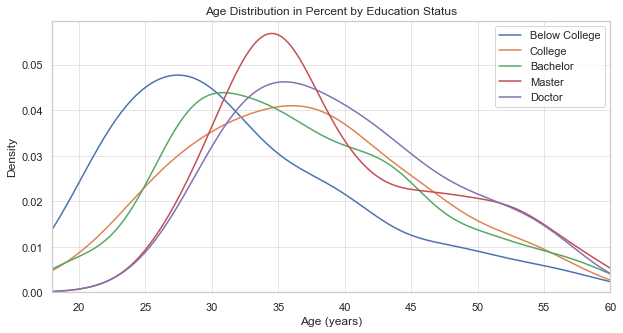

In [22]:
plt.figure(figsize=(10,5))
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Education'] == 1 , 'Age'], label = 'Below College' )
sns.kdeplot(data.loc[data['Education'] ==  2 , 'Age'], label = 'College')
sns.kdeplot(data.loc[data['Education'] == 3 , 'Age'], label = 'Bachelor')
sns.kdeplot(data.loc[data['Education'] == 4 , 'Age'], label = 'Master')
sns.kdeplot(data.loc[data['Education'] == 5 , 'Age'], label = 'Doctor')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Education Status');

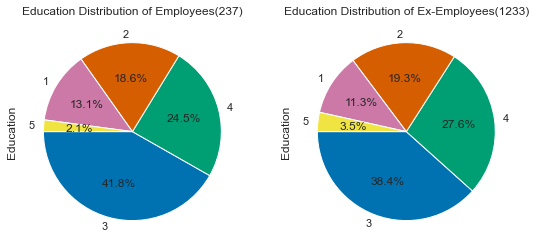

In [23]:
yes_group = data[data["Attrition"]=="Yes"]
no_group = data[data["Attrition"]=="No"]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
yes_group["Education"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title('Education Distribution of Employees('+str(len(yes_group))+')');

fig.add_subplot(2,2,2)
no_group["Education"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title('Education Distribution of Ex-Employees('+str(len(no_group))+')');

As we can see there is no big gap between monthly income mean based on education level. 

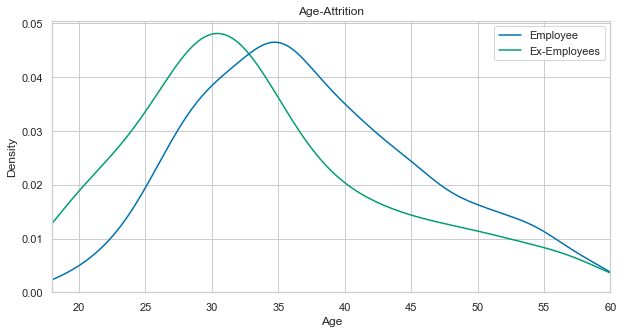

In [24]:
plt.figure(figsize=(10,5))

sns.kdeplot(data.loc[data['Attrition'] == 'No', 'Age'], label = 'Employee',palette="ch:.25")
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees',palette="ch:.25")

plt.xlim(left=18, right=60)#min max values
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.title('Age-Attrition');

We see from the graph that most of ex-employees are young.

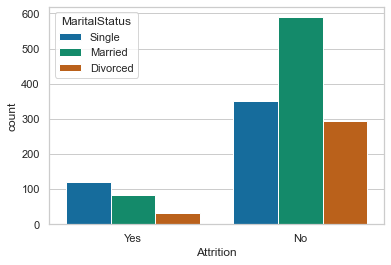

In [25]:
sns.countplot(x='Attrition', hue= 'MaritalStatus', data = data)
plt.show()

Most of ex-employees are single. On the other hand, married people have top rate.

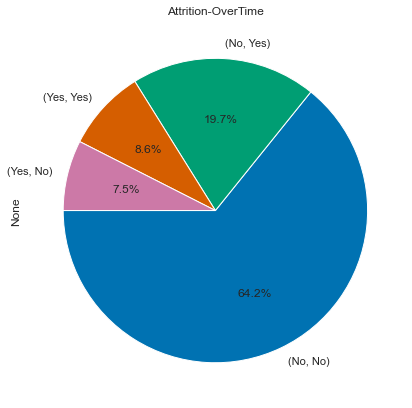

In [26]:
fig=plt.figure(figsize=(7,7))
plt.style.use('seaborn-colorblind')
data[["Attrition","OverTime"]].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title('Attrition-OverTime');

While 16.1% of the data is attrition, 8.6% of it experienced overtime. That means, 53.4% of ex-employees has an overtime issue. On the other hand, %23.4 of the employees also has overtime in the job. 

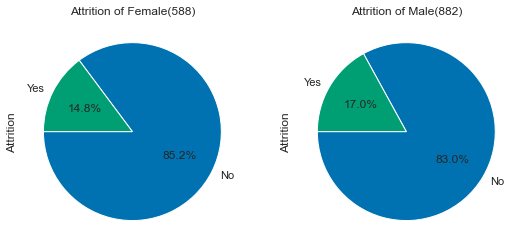

In [27]:
female_group = data[data["Gender"]=="Female"]
male_group = data[data["Gender"]=="Male"]

fig=plt.figure(figsize=(9,9))
plt.style.use('seaborn-colorblind')
fig.add_subplot(2,2,1)
female_group["Attrition"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title('Attrition of Female('+str(len(female_group))+')');

fig.add_subplot(2,2,2)
male_group["Attrition"].value_counts().plot(kind="pie",  subplots=True,autopct='%1.1f%%', startangle=180)

plt.title('Attrition of Male('+str(len(male_group))+')');

87 female and 150 male people are ex-employees. Depend on pie charts, male people decide to quit the job more often.

# Pre-processing

In [28]:
class ConvertingData(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['Target'] = X['Attrition'].apply(lambda x: 0 if x == 'No' else 1)
        X.drop(['EmployeeCount', 'StandardHours', 'Over18', 'Attrition'], axis=1,inplace=True)
        arr_cat = X.select_dtypes(include='object')
        dummy_col = [column for column in arr_cat if X[column].nunique() < 20]
        return pd.get_dummies(X, columns=dummy_col, drop_first=True, dtype='int64')
        


In [29]:
converter = ConvertingData()
data = converter.fit_transform(data)

# Scaling with MinMaxScaler

In [30]:
class ScalerData(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        target = X["Target"]
        scaler = MinMaxScaler()
        scaled = list(X.columns)
        scaled.remove('Target')
        for col in scaled:
            X[col] = X[col].astype(float)
            X[[col]] = scaler.fit_transform(X[[col]])
        return X

In [31]:
scaler = ScalerData()
data = scaler.fit_transform(data)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DailyRate                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   Education                          1470 non-null   float64
 4   EmployeeNumber                     1470 non-null   float64
 5   EnvironmentSatisfaction            1470 non-null   float64
 6   HourlyRate                         1470 non-null   float64
 7   JobInvolvement                     1470 non-null   float64
 8   JobLevel                           1470 non-null   float64
 9   JobSatisfaction                    1470 non-null   float64
 10  MonthlyIncome                      1470 non-null   float64
 11  MonthlyRate                        1470 non-null   float

# Splitting Dataset for Training and Testing 

In [33]:
target = data["Target"]
data = data.loc[:, data.columns != 'Target']
np.random.seed(12345)
num = np.random.randint(1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=num, stratify=target)  
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)
data["Target"] = target

X_train dataset:  (1102, 45)
y_train dataset:  (1102,)
X_test dataset:  (368, 45)
y_test dataset:  (368,)


# Training and Selecting Models

In [34]:
CV = 5

In [35]:
rfc_model = RandomForestClassifier()
log_model = LogisticRegression()
svm_model = SVC()

In [36]:
%%time
rfc_model.fit(X_train, y_train)
rfc_y_pred = rfc_model.predict(X_test)

print('Accuracy score of RandomForest: ' + str(accuracy_score(y_test, rfc_y_pred)))

Accuracy score of RandomForest: 0.8559782608695652
CPU times: total: 328 ms
Wall time: 331 ms


In [37]:
%%time
rfc_train_predict = cross_val_predict(rfc_model, X_train, y_train, cv=CV)
rfc_test_predict = cross_val_predict(rfc_model, X_test, y_test, cv=CV)
rfc_accuracy = accuracy_score(y_train, rfc_train_predict)
print('Accuracy score of RandomForest(Train): ' + str(rfc_accuracy))
print('Accuracy score of RandomForest(Test): ' + str(accuracy_score(y_test, rfc_test_predict)))

Accuracy score of RandomForest(Train): 0.8566243194192378
Accuracy score of RandomForest(Test): 0.8478260869565217
CPU times: total: 2.25 s
Wall time: 2.25 s


In [38]:
%%time
log_model.fit(X_train, y_train)
log_y_pred_train = log_model.predict(X_train)
log_y_pred = log_model.predict(X_test)

print('Accuracy score of Logistic Regression: ' + str(accuracy_score(y_test, log_y_pred)))

Accuracy score of Logistic Regression: 0.8885869565217391
CPU times: total: 15.6 ms
Wall time: 32.3 ms


In [39]:
%%time
log_train_predict = cross_val_predict(log_model, X_train, y_train, cv=CV)
log_test_predict = cross_val_predict(log_model, X_test, y_test, cv=CV)
log_accuracy = accuracy_score(y_train, log_train_predict)
print('Accuracy score of Logistic Regression(Train): ' + str(log_accuracy))
print('Accuracy score of Logistic Regression(Test): ' + str(accuracy_score(y_test, log_test_predict)))

Accuracy score of Logistic Regression(Train): 0.8765880217785844
Accuracy score of Logistic Regression(Test): 0.8641304347826086
CPU times: total: 141 ms
Wall time: 172 ms


In [40]:
%%time
svm_model.fit(X_train, y_train)
svm_y_pred_train = svm_model.predict(X_train)
svm_y_pred = svm_model.predict(X_test)

accuracy_score(y_test, svm_y_pred)
print('Accuracy score of SVM: ' + str(accuracy_score(y_test, svm_y_pred)))

Accuracy score of SVM: 0.8532608695652174
CPU times: total: 188 ms
Wall time: 202 ms


In [41]:
%%time
svm_train_predict = cross_val_predict(svm_model, X_train, y_train, cv=CV)
svm_test_predict = cross_val_predict(svm_model, X_test, y_test, cv=CV)
svm_accuracy = accuracy_score(y_train, svm_train_predict)
print('Accuracy score of SVM(Train): ' + str(svm_accuracy))
print('Accuracy score of SVM(Test): ' + str(accuracy_score(y_test, svm_test_predict)))

Accuracy score of SVM(Train): 0.8620689655172413
Accuracy score of SVM(Test): 0.8478260869565217
CPU times: total: 297 ms
Wall time: 304 ms


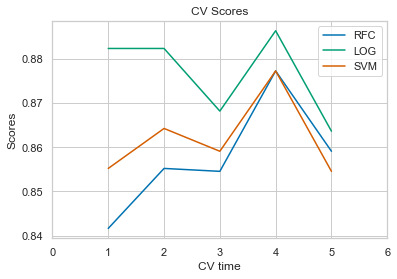

In [42]:
y = [1, 2, 3, 4, 5]
rfc_scores = cross_val_score(rfc_model, X_train, y_train, cv=CV, scoring = "accuracy")
log_scores = cross_val_score(log_model, X_train, y_train, cv=CV, scoring = "accuracy")
svm_scores = cross_val_score(svm_model, X_train, y_train, cv=CV, scoring = "accuracy")

plt.plot(y,rfc_scores, label = "RFC")
plt.plot(y,log_scores, label = "LOG")
plt.plot(y,svm_scores, label = "SVM")
plt.xlim(0,6)
plt.title("CV Scores")
plt.xlabel("CV time")
plt.ylabel("Scores")
plt.legend()
plt.show()

In [43]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5)):
    
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

No handles with labels found to put in legend.


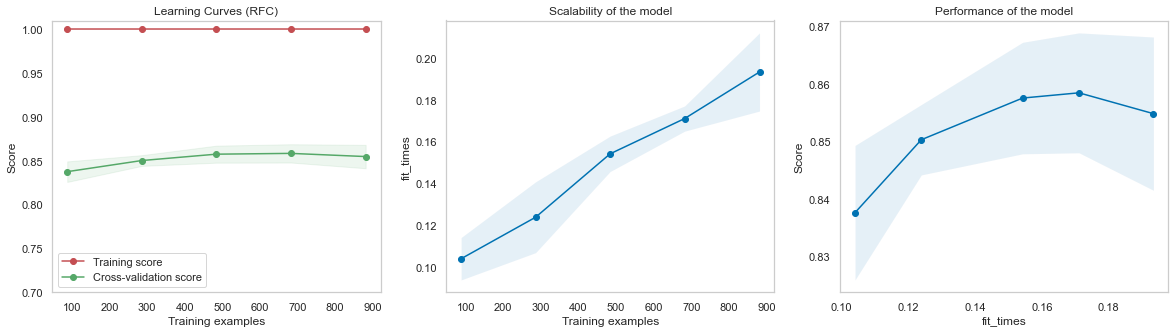

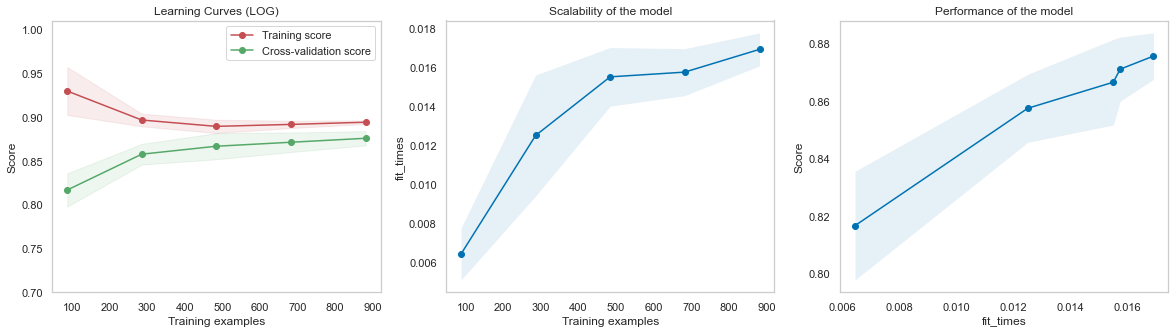

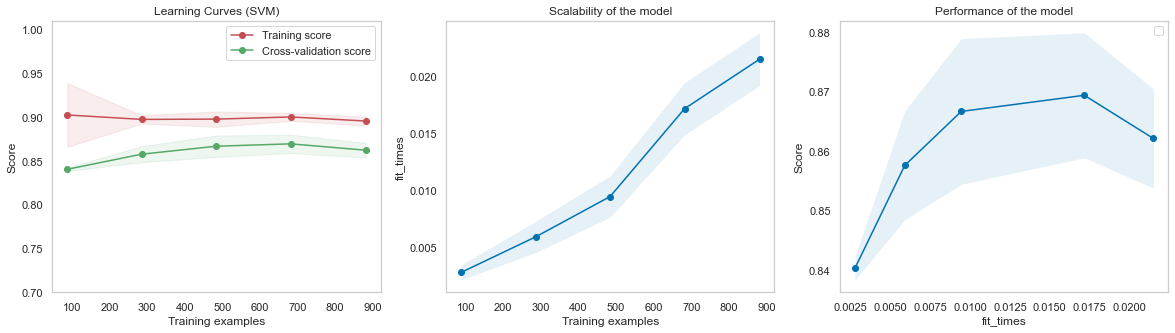

In [44]:
title_rfc = r"Learning Curves (RFC)"
title_log = r"Learning Curves (LOG)"
title_svm = r"Learning Curves (SVM)"
plot_learning_curve(
    rfc_model, title_rfc, X_train, y_train, ylim=(0.7, 1.01), cv=CV, n_jobs=4
)
plot_learning_curve(
    log_model, title_log, X_train, y_train, ylim=(0.7, 1.01), cv=CV, n_jobs=4
)
plot_learning_curve(
    svm_model, title_svm, X_train, y_train, ylim=(0.7, 1.01), cv=CV, n_jobs=4
)
plt.legend()
plt.show()

After these charts, for RFC there is overfitting but for others, there is no overfit or underfit problem.

In [45]:
rfc_mean_score = rfc_scores.mean()
log_mean_score = log_scores.mean()
svm_mean_score = svm_scores.mean()

rfc_std_score = rfc_scores.std()
log_std_score = log_scores.std()
svm_std_score = svm_scores.std()

In [46]:
rfc_f1_macro = f1_score(y_test, rfc_test_predict, average='macro')
rfc_f1_micro = f1_score(y_test, rfc_test_predict, average='micro')
rfc_f1_weight = f1_score(y_test, rfc_test_predict, average='weighted')

log_f1_macro = f1_score(y_test, log_test_predict, average='macro')
log_f1_micro = f1_score(y_test, log_test_predict, average='micro')
log_f1_weight = f1_score(y_test, log_test_predict, average='weighted')

svm_f1_macro = f1_score(y_test, svm_test_predict, average='macro')
svm_f1_micro = f1_score(y_test, svm_test_predict, average='micro')
svm_f1_weight = f1_score(y_test, svm_test_predict, average='weighted')

In [47]:
rfc_macro_recall = recall_score(y_test, rfc_test_predict, average='macro')
rfc_micro_recall = recall_score(y_test, rfc_test_predict, average='micro')
rfc_weight_recall = recall_score(y_test, rfc_test_predict, average='weighted')

log_macro_recall = recall_score(y_test, log_test_predict, average='macro')
log_micro_recall = recall_score(y_test, log_test_predict, average='micro')
log_weight_recall = recall_score(y_test, log_test_predict, average='weighted')

svm_macro_recall = recall_score(y_test, svm_test_predict, average='macro')
svm_micro_recall = recall_score(y_test, svm_test_predict, average='micro')
svm_weight_recall = recall_score(y_test, svm_test_predict, average='weighted')

In [48]:
rfc_mae = mean_absolute_error(y_test, rfc_test_predict)
log_mae = mean_absolute_error(y_test, log_test_predict)
svm_mae = mean_absolute_error(y_test, svm_test_predict)

In [49]:
rfc_mse = mean_squared_error(y_test, rfc_test_predict)
log_mse = mean_squared_error(y_test, log_test_predict)
svm_mse = mean_squared_error(y_test, svm_test_predict)

In [50]:
rfc_auc= roc_auc_score(y_test, rfc_test_predict, multi_class='ovr')
log_auc= roc_auc_score(y_test, log_test_predict, multi_class='ovr')
svm_auc= roc_auc_score(y_test, svm_test_predict, multi_class='ovr')

In [51]:
df = pd.DataFrame(columns=["Metrics", "RFC", "LOG", "SVM"])

In [52]:
metrics_arr = ["Mean", "STD", "Accuracy",
               "F1-Score Macro", "F1-Score Micro", "F1-Score Weighted",
               "Recall-Score Macro", "Recall-Score Micro", "Recall-Score Weighted",
              "MAE", "MSE", "ROC-AUC"]

In [53]:
df["Metrics"] = metrics_arr

In [54]:
df["RFC"] = [rfc_mean_score, rfc_std_score, rfc_accuracy,
             rfc_f1_macro, rfc_f1_micro, rfc_f1_weight,
            rfc_macro_recall, rfc_micro_recall, rfc_weight_recall,
            rfc_mae, rfc_mse, rfc_auc]
df["LOG"] = [log_mean_score, log_std_score, log_accuracy,
             log_f1_macro, log_f1_micro, log_f1_weight,
            log_macro_recall, log_micro_recall, log_weight_recall,
            log_mae, log_mse, log_auc]
df["SVM"] = [svm_mean_score, svm_std_score, svm_accuracy,
             svm_f1_macro, svm_f1_micro, svm_f1_weight,
            svm_macro_recall, svm_micro_recall, svm_weight_recall,
            svm_mae, svm_mse, svm_auc]

In [55]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11
Metrics,Mean,STD,Accuracy,F1-Score Macro,F1-Score Micro,F1-Score Weighted,Recall-Score Macro,Recall-Score Micro,Recall-Score Weighted,MAE,MSE,ROC-AUC
RFC,0.857548,0.011484,0.856624,0.533967,0.847826,0.793784,0.539137,0.847826,0.847826,0.152174,0.152174,0.539137
LOG,0.876578,0.008949,0.876588,0.633174,0.86413,0.830911,0.603697,0.86413,0.86413,0.13587,0.13587,0.603697
SVM,0.862073,0.008349,0.862069,0.506844,0.847826,0.785424,0.525424,0.847826,0.847826,0.152174,0.152174,0.525424


# Comparing Time and Accuracy 

<br>
RFC training and test time = ~1.86 s <br>
LOG training and test time = ~172 ms <br>
SVM training and test time = ~266 ms <br>
<br>
RFC accuracy = 0.856624 <br>
LOG accuracy = 0.876588 <br>
SVM accuracy = 0.862069	<br>
<br>
Considering this, the fastest result and the highest accuracy are in logistic regression. <br>
These values are not sharp. It belongs to only one of many runs.

# Parameter Tuning

There are GridSearchCV and RandomizedSearchCV to search the best parameters but I will try to find manually.

In [56]:
#for lOG
penalty, C_log, solver = ['l1', 'l2'], np.logspace(-4, 4, 20), 'liblinear'
#for RFC
#n_est = list(range(10,101,10))
#max_feat= list(range(6,32,5))
#for SVM
C_svm, gamma, kernel = [0.1,1, 10, 100], [1,0.1,0.01,0.001], ['rbf', 'poly', 'sigmoid']

In [57]:
%%time
accuracies_train_log = []
accuracies_test_log = []
cc = []
penal = []
for pen_i in penalty:
    for c in C_log:
        log = LogisticRegression(C =c, solver = solver, penalty = pen_i)
        cc.append(str(c))
        penal.append(pen_i)
        log.fit(X_train, y_train)
        log_pred_train = log.predict(X_train)
        log_pred = log.predict(X_test)

        accuracies_train_log.append(accuracy_score(y_train, log_pred_train))
        accuracies_test_log.append(accuracy_score(y_test, log_pred))

CPU times: total: 2.92 s
Wall time: 2.93 s


In [58]:
accuracies_log = pd.DataFrame(columns = ["C","Penalty", "Acc_Train", "Acc_Test"])

In [59]:
accuracies_log["C"] = cc
accuracies_log["Penalty"] = penal
accuracies_log["Acc_Train"] = accuracies_train_log
accuracies_log["Acc_Test"] = accuracies_test_log

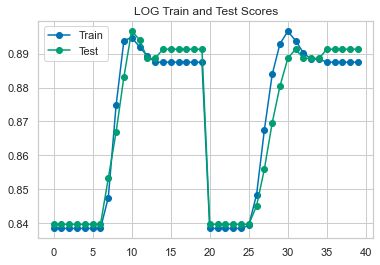

In [60]:
plt.plot(accuracies_log["Acc_Train"], '-o', label='Train')
plt.plot(accuracies_log["Acc_Test"], '-o', label='Test')
plt.title("LOG Train and Test Scores")
plt.legend()
plt.show()

In [61]:
accuracies_log.iloc[10,:]

C            1.623776739188721
Penalty                     l1
Acc_Train             0.894737
Acc_Test              0.896739
Name: 10, dtype: object

In [62]:
accuracies_log.iloc[30,:]

C            1.623776739188721
Penalty                     l2
Acc_Train             0.896552
Acc_Test              0.888587
Name: 30, dtype: object

In [63]:
%%time
accuracies_train_rfc = []
accuracies_test_rfc = []
n_estimators, max_features = [], []
for estimator in list(range(10,101,10)):
    for max_f in list(range(6,32,5)):
        rfc = RandomForestClassifier(n_estimators =estimator, max_features = max_f)
        n_estimators.append(str(estimator))
        max_features.append(max_f)
        rfc.fit(X_train, y_train)
        rfc_pred_train = rfc.predict(X_train)
        rfc_pred = rfc.predict(X_test)

        accuracies_train_rfc.append(accuracy_score(y_train, rfc_pred_train))
        accuracies_test_rfc.append(accuracy_score(y_test, rfc_pred))

CPU times: total: 17.6 s
Wall time: 17.6 s


In [64]:
accuracies_rfc = pd.DataFrame(columns = ["n_estimators","max_features", "Acc_Train", "Acc_Test"])
accuracies_rfc["n_estimators"] = n_estimators
accuracies_rfc["max_features"] = max_features
accuracies_rfc["Acc_Train"] = accuracies_train_rfc
accuracies_rfc["Acc_Test"] = accuracies_test_rfc

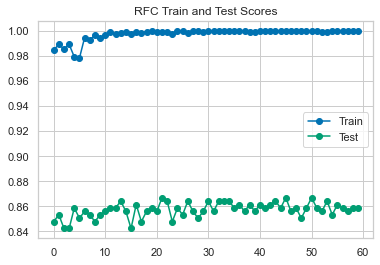

In [65]:
plt.plot(accuracies_rfc["Acc_Train"], '-o', label='Train')
plt.plot(accuracies_rfc["Acc_Test"], '-o', label='Test')
plt.title("RFC Train and Test Scores")
plt.legend()
plt.show()

In [66]:
accuracies_rfc.head(11)

,n_estimators,max_features,Acc_Train,Acc_Test
0,10,6,0.984574,0.847826
1,10,11,0.989111,0.853261
2,10,16,0.985481,0.842391
3,10,21,0.989111,0.842391
4,10,26,0.979129,0.858696
5,10,31,0.978221,0.850543
6,20,6,0.994555,0.855978
7,20,11,0.992740,0.853261
8,20,16,0.996370,0.847826
9,20,21,0.994555,0.853261


In [67]:
accuracies_log[accuracies_log["Acc_Test"] == accuracies_log["Acc_Test"].max()]

,C,Penalty,Acc_Train,Acc_Test
10,1.623776739188721,l1,0.894737,0.896739


In [68]:
%%time
accuracies_train_svc = []
accuracies_test_svc = []
used_C_svm, used_gamma, used_kernel = [], [], []
for c in C_svm:
    for gm in gamma:
        for krnl in kernel:
            svc = SVC(C= c, gamma=gm, kernel=krnl)
            used_C_svm.append(c)
            used_gamma.append(gm)
            used_kernel.append(krnl)
            svc.fit(X_train, y_train)
            svc_pred_train = svc.predict(X_train)
            svc_pred = svc.predict(X_test)

            accuracies_train_svc.append(accuracy_score(y_train, svc_pred_train))
            accuracies_test_svc.append(accuracy_score(y_test, svc_pred))

CPU times: total: 7.56 s
Wall time: 7.72 s


In [69]:
accuracies_svc = pd.DataFrame(columns = ["used_C_svm","used_gamma","used_kernel", "Acc_Train", "Acc_Test"])
accuracies_svc["used_C_svm"] = used_C_svm
accuracies_svc["used_gamma"] = used_gamma
accuracies_svc["used_kernel"] = used_kernel
accuracies_svc["Acc_Train"] = accuracies_train_svc
accuracies_svc["Acc_Test"] = accuracies_test_svc

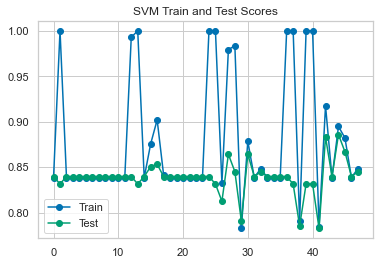

In [70]:
plt.plot(accuracies_svc["Acc_Train"], '-o', label='Train')
plt.plot(accuracies_svc["Acc_Test"], '-o', label='Test')
plt.title("SVM Train and Test Scores")
plt.legend()
plt.show()

For some parameters, there is overfitting problem. But there are good performed pairs in the graph. 

In [71]:
accuracies_svc["Acc_Test"].max()

0.8858695652173914

In [72]:
accuracies_svc[accuracies_svc["Acc_Test"] == accuracies_svc["Acc_Test"].max()]

,used_C_svm,used_gamma,used_kernel,Acc_Train,Acc_Test
44,100.0,0.01,sigmoid,0.894737,0.88587


In [73]:
accuracies_svc.iloc[44,:]

used_C_svm        100.0
used_gamma         0.01
used_kernel     sigmoid
Acc_Train      0.894737
Acc_Test        0.88587
Name: 44, dtype: object

Before Tuning and After Tuning

In [74]:
before_after = pd.DataFrame(columns = ["Models", "Base", "Tuned"])

In [75]:
before_after["Models"] = ["RFC", "LOG", "SVM"]

In [76]:
before_after["Base"] = [rfc_accuracy, log_accuracy, svm_accuracy]

In [77]:
before_after["Tuned"] = [accuracies_rfc.iloc[10,3], accuracies_log.iloc[10,3], accuracies_svc.iloc[42,4]]

In [78]:
before_after

,Models,Base,Tuned
0,RFC,0.856624,0.855978
1,LOG,0.876588,0.896739
2,SVM,0.862069,0.883152


As we can see, parameter tuning changed the accuracy.
After this part, I will continue with Logistic Regression.

# Choosing 5 Parameters

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   DailyRate                          1470 non-null   float64
 2   DistanceFromHome                   1470 non-null   float64
 3   Education                          1470 non-null   float64
 4   EmployeeNumber                     1470 non-null   float64
 5   EnvironmentSatisfaction            1470 non-null   float64
 6   HourlyRate                         1470 non-null   float64
 7   JobInvolvement                     1470 non-null   float64
 8   JobLevel                           1470 non-null   float64
 9   JobSatisfaction                    1470 non-null   float64
 10  MonthlyIncome                      1470 non-null   float64
 11  MonthlyRate                        1470 non-null   float

In [80]:
class ChoosingKBest(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        target = X["Target"]
        X = X.drop(["Target"], axis=1)
        select = SelectKBest(score_func=chi2, k=5)
        X = select.fit_transform(X,target)
        X = pd.DataFrame(X)
        X["Target"] = target
        return X

In [81]:
chooser = ChoosingKBest()
data = chooser.fit_transform(data)

In [82]:
data.head()

,0,1,2,3,4,Target
0,0.25,0.0,0.0,1.0,1.0,1
1,0.25,1.0,0.0,0.0,0.0,0
2,0.00,0.0,0.0,1.0,1.0,1
3,0.00,1.0,0.0,0.0,1.0,0
4,0.00,0.0,0.0,0.0,0.0,0


In [83]:
target = data["Target"]
data = data.drop(["Target"], axis=1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=num, stratify=target)  
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1102, 5)
y_train dataset:  (1102,)
X_test dataset:  (368, 5)
y_test dataset:  (368,)


In [85]:
unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)).T)
unique_test, counts_test = np.unique(y_test, return_counts=True)
print(np.asarray((unique_test, counts_test)).T)

[[  0 924]
 [  1 178]]
[[  0 309]
 [  1  59]]


In [86]:
#choosed_model = LogisticRegression(C = 1.623776739188721, penalty='l1', solver='liblinear')
choosed_model = LogisticRegression(C = 1.623776739188721, penalty='l1', solver='liblinear')

In [87]:
%%time
choosed_model.fit(X_train, y_train)
y_pred = choosed_model.predict(X_test)

accuracy_score(y_test, y_pred)
print('Accuracy score of LOG: ' + str(accuracy_score(y_test, y_pred)))

Accuracy score of LOG: 0.8396739130434783
CPU times: total: 15.6 ms
Wall time: 8.78 ms


In [88]:
%%time
scores = cross_val_score(choosed_model, X_train, y_train, scoring='accuracy', cv=CV)
scores_test = cross_val_score(choosed_model, X_test, y_test, scoring='accuracy', cv=CV)
print(scores)
print(scores_test)

[0.83710407 0.83710407 0.83181818 0.86363636 0.84545455]
[0.86486486 0.82432432 0.86486486 0.83561644 0.8630137 ]
CPU times: total: 93.8 ms
Wall time: 94 ms


In [89]:
pipeline = Pipeline(
    [
        ("converter" , ConvertingData()),
        ("scaler" , ScalerData()),
        ("chooser",ChoosingKBest()),
    ]
)

In the end,<br>
Before Parameter Tuning, Time and Accuracy of LogisticRegression:172 ms and 0.876588 <br>
After Parameter Tuning, Time and Accuracy of LogisticRegression: 190 ms 0.896739 <br>
After Choosing 5 Best Features, Time and Accuracy of LogisticRegression:31.2 ms and 0.84 <br>

In [90]:
pickle.dump(pipeline,open("preprocessing.pkl", "wb"))
pickle.dump(choosed_model,open("model.pkl", "wb"))

In [91]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(classification_report(y_test, y_pred, 
                                    target_names= ["1","0"]))

				CLASSIFICATIION METRICS

              precision    recall  f1-score   support

           1       0.85      0.98      0.91       309
           0       0.50      0.08      0.14        59

    accuracy                           0.84       368
   macro avg       0.67      0.53      0.53       368
weighted avg       0.79      0.84      0.79       368

